<a href="https://colab.research.google.com/github/gargmukul91066/Deep-Learning-DL-/blob/main/ANN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## Divide the dataset into independent features and dependent features
X=dataset.iloc[:,3:13]   # i don't want RowNumber,CustomerId,Surname
y=dataset.iloc[:,13]


In [4]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [6]:
# Feature Engineering (one hot encoding)
geography=pd.get_dummies(X['Geography'],drop_first=True).astype(int)
gender=pd.get_dummies(X['Gender'],drop_first=True).astype(int)

In [7]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [8]:
## Concatenate these variables with dataframe
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [9]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [10]:
pd.concat([X,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [11]:
# Divide the dataset into Train set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [13]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [14]:
X_train.shape

(8000, 8)

In [15]:
# Now Let's create the ANN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU

In [16]:
classifier=Sequential()


In [17]:
## Adding the input Layer
classifier.add(Dense(units=11,activation='relu'))

In [38]:
## Adding the hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [19]:
## Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [20]:
## Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [23]:
## Now train the entire Neural Network
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)


In [24]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)



In [25]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7650 - loss: 0.5145 - val_accuracy: 0.8114 - val_loss: 0.4162
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8523 - loss: 0.3690 - val_accuracy: 0.8175 - val_loss: 0.4135
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8484 - loss: 0.3687 - val_accuracy: 0.8466 - val_loss: 0.3788
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8492 - loss: 0.3625 - val_accuracy: 0.8444 - val_loss: 0.3817
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8472 - loss: 0.3651 - val_accuracy: 0.8463 - val_loss: 0.3785
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8568 - loss: 0.3456 - val_accuracy: 0.8432 - val_loss: 0.3769
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8518 - loss: 0.3575 - val_accuracy: 0.8440 - val_loss: 0.3746
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8528 - loss: 0.3598 - 

In [29]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

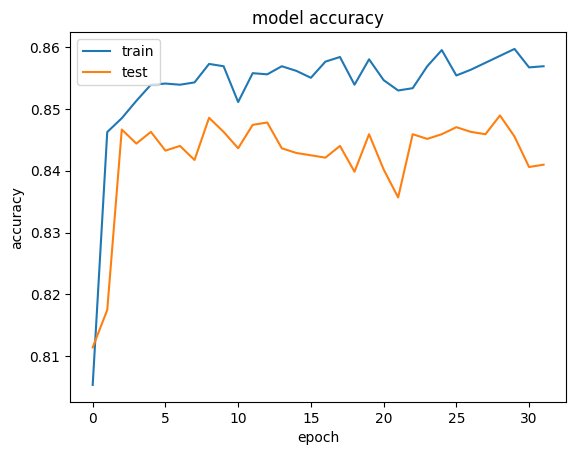

In [30]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

'''If both curves go up → The model is learning well. ✅
If training accuracy is high but validation accuracy is low → The model is overfitting. 🚨
If both stay low → The model is underfitting (not learning enough). 😕
'''

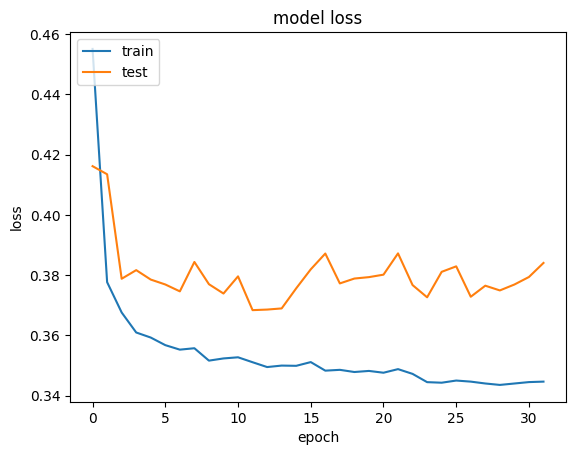

In [31]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

'''If both losses decrease → The model is learning well. ✅
If validation loss stops decreasing or increases while training loss keeps decreasing → The model is overfitting (memorizing training data, not generalizing). 🚨
If both losses stay high → The model is underfitting (not learning well). 😕'''


In [32]:
# part 3- Making predictions and evaluating the model

# predicting the Test set Results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)
'''y_pred contains probabilities (values between 0 and 1) predicted by the model.
(y_pred > 0.5) checks if each prediction is greater than 0.5:
If greater than 0.5, it's classified as True (1).
If less than or equal to 0.5, it's classified as False (0).
The result is stored back in y_pred as a binary array (only 0s and 1s).'''

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


"y_pred contains probabilities (values between 0 and 1) predicted by the model.\n(y_pred > 0.5) checks if each prediction is greater than 0.5:\nIf greater than 0.5, it's classified as True (1).\nIf less than or equal to 0.5, it's classified as False (0).\nThe result is stored back in y_pred as a binary array (only 0s and 1s)."

In [33]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1525,   70],
       [ 222,  183]])

In [35]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score*100


85.39999999999999

In [37]:
 ## get the weights
 classifier.get_weights()

[array([[ 0.90886164, -0.26992068, -0.04215478, -0.30979913,  0.05098751,
          0.52495825, -0.8021064 ,  0.2988123 ,  0.70103186, -0.38664603,
          0.29474464],
        [-2.4019704 ,  2.434253  , -1.9545536 ,  1.4752381 , -0.05848332,
         -1.9905723 ,  0.54240584,  2.142493  , -0.34853202,  0.15792389,
          1.7344095 ],
        [ 0.37854785,  0.61128175,  0.87962717,  0.6284175 , -0.22811121,
          0.5467707 ,  0.83160126, -0.4841585 ,  1.8975194 ,  0.723067  ,
         -0.28763357],
        [-0.43985134,  0.07794032, -0.9874874 ,  0.31126276,  0.9188963 ,
          0.9224265 , -2.042984  ,  0.7995436 ,  0.5890071 , -2.91329   ,
         -0.77750206],
        [-0.9397915 ,  2.557481  , -0.05534144, -1.1873776 ,  2.8216505 ,
         -1.6493604 , -2.7209203 , -2.490446  , -1.8791784 ,  0.5167649 ,
         -0.0648128 ],
        [ 0.9770764 , -0.09531251, -1.4306705 ,  0.24979573, -0.3676508 ,
          0.22297698, -0.5100214 , -0.01603775, -0.9332292 ,  0.0232563